<a href="https://colab.research.google.com/github/wilburshi/LogisticRegression_tutorial/blob/main/LogisticRegression_JuiceChoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Juice Choice Task

This code aims to use logistic regression to analyze the behavioral pattern when monkey were choosing the two juice options presented as the same time. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit

First, let's load example data file named as `goodTrials_JC.mat`. It only contains trials that monkey has successfully chosen one of the juice option.  

`goodTrials_JC.mat` is a $N \times 4$, where $N$ is the number of the trials in this session, and in this example, $N =176$. The columns of this matrix indicated:

 - *column 1*: the trial number.

 - *column 2*: the quantity of juice A. The negative sign indicated that the stimulus/target is on the left side of the screen.
 
 - *column 3*: the quantity of juice B. The negative sign indicated that the stimulus/target is on the left side of the screen.
 
 - *column 4*: the chosen juice type, with 1 indicating A and 2 indicating B.


In [ ]:
data = loadmat('../data/goodtrials_JC.mat')['goodTrials_JC'] # loadmat is a function in scipy.io used to load Matlab data file

CJ = data[:,3]-1 # dependent variable: the type of chosen juice. 0: chosen A, 1: chosen B
QA = np.abs(data[:,1]) # quantity of juice A
QB = np.abs(data[:,2]) # quantity of juice B
SideA = np.sign(data[:,1]) # side of target A. -1: left, 1: right, 0 forced choice
SideB = np.sign(data[:,2]) # side of target B. -1: left, 1: right, 0 forced choice

ind_forced = (data[:,1] == 0) | (data[:,2] == 0) # index of forced choice
ind_nonforced = ~ind_forced

## Probit regression
1. Probit regression with the quantity ratio $Q_B / Q_A$

In [ ]:
Y = CJ[ind_nonforced]
X = np.log(QB[ind_nonforced]/QA[ind_nonforced])
const = np.ones(X.shape)

model = Probit(Y, np.transpose([const, X]))
probit_model = model.fit()
betas = probit_model.params
# print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.285275
         Iterations 8


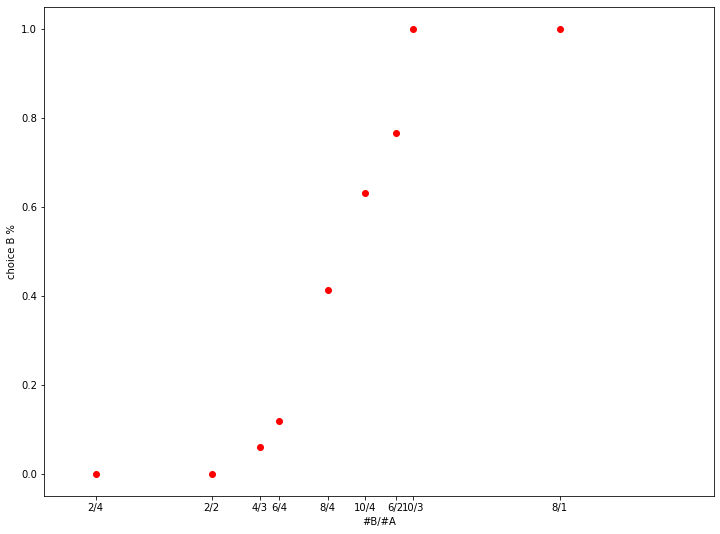

In [ ]:
#####
# plot the results #
#####
table01 = np.unique([QB[ind_nonforced], QA[ind_nonforced]], axis = 1) # create trial type table from individual trials
X_table = np.log(table01[0,:]/table01[1,:])
indices = np.argsort(X_table)
X_table = X_table[indices]
# X_forceA = np.min(X_table) - np.log(2)
# X_forceB = np.max(X_table) + np.log(2)
# X_table = np.hstack((X_forceA, X_table, X_forceB))

# calculate the choice probability P(B) #
ntritype = np.shape(table01)[1]
LogRatio = np.log(table01[0,:]/table01[1,:])
PB = np.array([])
xtickname = np.array([])
for itritype in np.arange(0, ntritype,1):
    ind_itritype = (np.transpose([QB, QA]) == np.transpose(table01)[itritype,:]).all(axis=1)
    CJ_itritype = CJ[ind_itritype]
    PB_itritype = np.sum(CJ_itritype)/(np.shape(CJ_itritype)[0])
    PB = np.append(PB,PB_itritype)
    xtickname_itritype = np.array2string(table01[0,itritype])+'/'+np.array2string(table01[1,itritype])
    xtickname = np.append(xtickname,xtickname_itritype)
    
# plot data point - trial types #
fig= plt.figure(figsize=(12,9))
plt.plot(LogRatio,PB, 'ro')
plt.axis([-1,3,-0.05,1.05])
plt.xlabel("#B/#A")
plt.ylabel("choice B %");
ax = plt.gca() 
ax.set_xticks(LogRatio)
ax.set_xticklabels(xtickname); 

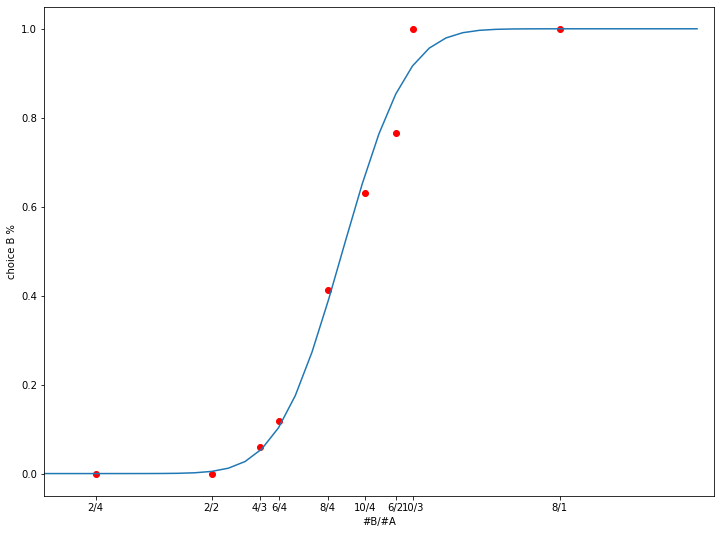

In [ ]:
# plot sigmoidal curve #    
X_plot = np.arange(np.floor(np.min(X_table)), np.ceil(np.max(X_table)), 0.1)
const_plot = np.ones(np.size(X_plot))
Y_plot = probit_model.predict(np.transpose([const_plot, X_plot]))

# plot
fig= plt.figure(figsize=(12,9))
plt.plot(LogRatio,PB, 'ro')
plt.plot(X_plot,Y_plot)
plt.axis([-1,3,-0.05,1.05])
plt.xlabel("#B/#A")
plt.ylabel("choice B %");
ax = plt.gca() 
ax.set_xticks(LogRatio)
ax.set_xticklabels(xtickname); 

In [ ]:
rho = np.exp(-betas[0]/betas[1])
print('relative value is: ', np.array2string(rho))
eta = betas[1]
print('steepness is: ', np.array2string(eta))


relative value is:  2.18647539
steepness is:  3.30671802
